In [1]:
import sys
import re
import json
import gzip
import numpy as np
import scipy.stats as ss
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
sys.path.append("../extra_scripts")
import plot_functions as pf

In [2]:
TRAIN_DATA_PATH =  "../data/cmv_triples_train_token.jsonlist.gz"

data = []
with gzip.open(TRAIN_DATA_PATH, 'r') as ifile:
    for curr in ifile.readlines():
        data.append(json.loads(curr))
        if len(data)%1000 == 0:
            print(len(data))

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000


In [3]:
def get_copy_prob_exp(text, out_quote=False, stopwords=None):
    explanation = get_words(text["explanation"], out_quote=out_quote, stopwords=stopwords)
    op = get_words(text["op_selftext"], out_quote=out_quote, stopwords=stopwords)
    pc = get_words(text["deltaed_comment"], out_quote=out_quote, stopwords=stopwords)
    oppc = op | pc
    if len(explanation) == 0:
        print(" ".join([v[1] for v in text["explanation"]]))
        return 0
    return len(explanation & oppc) / float(len(explanation))

In [4]:
def get_copy_prob_pc(text, out_quote=False, stopwords=None):
    op = get_words(text["op_selftext"], out_quote=out_quote, stopwords=stopwords)
    pc = get_words(text["deltaed_comment"], out_quote=out_quote, stopwords=stopwords)
    if len(pc) == 0:
        print(" ".join([v[1] for v in text["deltaed_comment"]]))
        return 0
    return len(pc & op) / float(len(pc))

In [5]:
def is_quote(w):
    return w == '“' or w == '”'

def get_words(token_patterns, out_quote=False, stopwords=None):
    words = [v[1].lower() for v in token_patterns]
    if out_quote:
        in_quote = False
        clean_words = []
        for w in words:
            if is_quote(w):
                in_quote = not in_quote
            if not in_quote and re.match("\w+", w):
                clean_words.append(w)
        words = clean_words
    else:
        words = [w for w in words if re.match("\w+", w)]
    if stopwords:
        return set(words) - stopwords
    return set(words)

In [6]:
STEMMER = PorterStemmer()
STOPWORDS = set([STEMMER.stem(w) for w in stopwords.words('english')])

In [7]:
exp_copy = [get_copy_prob_exp(d) for d in data]
exp_copy_out_quote = [get_copy_prob_exp(d, out_quote=True) for d in data]
exp_copy_nonstop = [get_copy_prob_exp(d, stopwords=STOPWORDS) for d in data]

@url@
@url@
@url@
@url@
@url@
@url@
again .
@url@
@url@
@url@


In [8]:
pc_copy = [get_copy_prob_pc(d) for d in data]
pc_copy_out_quote = [get_copy_prob_pc(d, out_quote=True) for d in data]
pc_copy_nonstop = [get_copy_prob_pc(d, stopwords=STOPWORDS) for d in data]

@url@
@url@
@url@
@url@ @url@ @url@ @url@ @url@ @url@ @url@ @url@ @url@ @url@ @url@ @url@ @url@ @url@ @url@ @url@ ) -wallpaper-002.jpg @url@ @url@ @url@ @url@ @url@
@url@
*
@url@
@url@
@url@
@url@
@url@
@url@
@url@
@url@ @url@ @url@ @url@ @url@
@url@
@url@ @url@
@url@
@url@
@url@
@url@
@url@
@url@
@url@
@url@ @url@ @url@ @url@ @url@ @url@ @url@ @url@ @url@ @url@ @url@ @url@ @url@ @url@ @url@ @url@ ) -wallpaper-002.jpg @url@ @url@ @url@ @url@ @url@
@url@
*
@url@
@url@
@url@
@url@
@url@
@url@
@url@
" : “ argument to moder ( latin : argumentum ad temperantiam)—also known as [ argument from ] middl ground , fals compromis , gray fallaci , and the golden mean fallaci — is an inform fallaci which assert that the truth must be found as a compromis between two opposit posit . " first off a fallaci doe n't instantli mean it wrong , it mean there is a weak point in the logic that must be examin close to determin if it wrong . second a philosoph fallaci doe n't quit appli in polit realiti . " som

In [9]:
value_list = [
    [np.mean(v) for v in [exp_copy, exp_copy_out_quote, exp_copy_nonstop]],
    [np.mean(v) for v in [pc_copy, pc_copy_out_quote, pc_copy_nonstop]]
]
error_list = [
    [ss.sem(v) for v in [exp_copy, exp_copy_out_quote, exp_copy_nonstop]],
    [ss.sem(v) for v in [pc_copy, pc_copy_out_quote, pc_copy_nonstop]]
]

In [10]:
value_list, error_list

([[0.5986184264166228, 0.597964488224717, 0.4168131894298118],
  [0.390290064067971, 0.3896610647105924, 0.23635151122676173]],
 [[0.0008354842685873842, 0.0008358271695216615, 0.0011177133043596206],
  [0.0008388860597069524, 0.0008373209897852627, 0.0008141690224262979]])

/data/anaconda3/envs/cmv-gen/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/data/anaconda3/envs/cmv-gen/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/data/anaconda3/envs/cmv-gen/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/data/anaconda3/envs/cmv-gen/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/data/anaconda3/envs/cmv-gen/lib/python3.7/site-packages/matplotlib/font_man

/data/anaconda3/envs/cmv-gen/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/data/anaconda3/envs/cmv-gen/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/data/anaconda3/envs/cmv-gen/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/data/anaconda3/envs/cmv-gen/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/data/anaconda3/envs/cmv-gen/lib/python3.7/site-packages/matplotlib/font_man

/data/anaconda3/envs/cmv-gen/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/data/anaconda3/envs/cmv-gen/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/data/anaconda3/envs/cmv-gen/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/data/anaconda3/envs/cmv-gen/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/data/anaconda3/envs/cmv-gen/lib/python3.7/site-packages/matplotlib/font_man

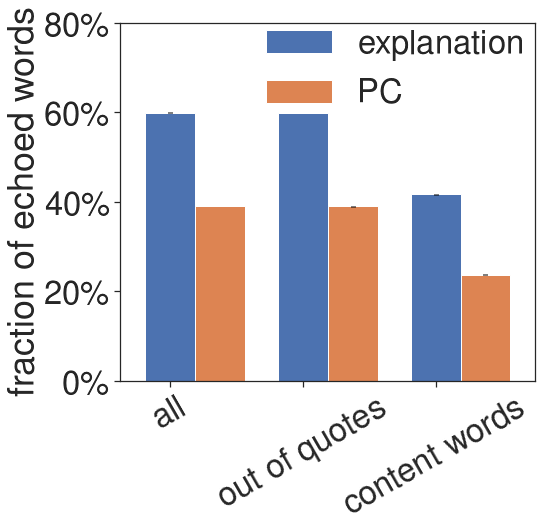

In [11]:
figure = pf.plot_bar(value_list, errorbar_list=error_list, legend=["explanation", "PC"],
                     loc=(0.32, 0.72),
                     ylabel="fraction of echoed words",
                     yticklabel=[[0.2 * i for i in range(5)], ["%d\%%" % (20 * i) for i in range(5)]],
                     xticklabel=["all", "out of quotes", "content words"],
                     fig_pos=[0.23, 0.26, 0.72, 0.71],
                     xlabel_rotation=30)

figure.savefig("../records/plots/copy_probability.png", bbox_inches="tight")